In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("bank_customers_cleaned_final.csv")

In [ ]:
df.head()

,churn,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_transaction_amount,total_transaction_count,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Setting seaborn theme
sns.set(style="whitegrid")

## Churn Distribution

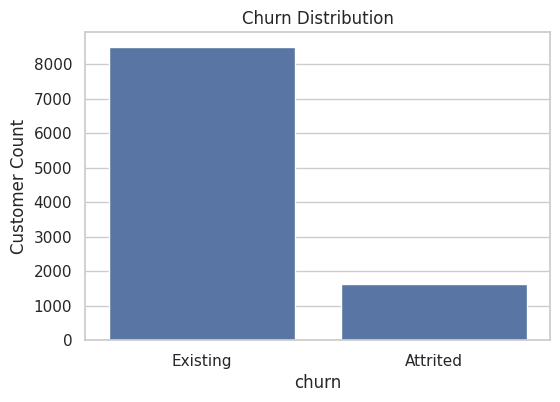

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.xticks([0, 1], ['Existing', 'Attrited'])
plt.ylabel("Customer Count")
plt.show()

## Age Distribution by Churn

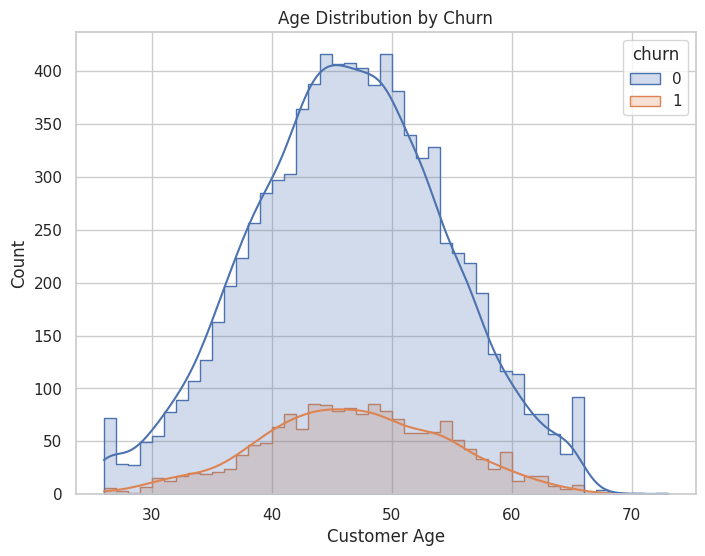

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data = df , x = 'customer_age' , hue='churn' , kde= True , element = 'step')
plt.title("Age Distribution by Churn")
plt.xlabel("Customer Age")
plt.ylabel("Count")
plt.show()

## Digital Engagment Score

In [ ]:
df['digital_engagement_score'] = (
    (df['total_transaction_amount'] / df['total_transaction_amount'].max()) * 0.5 +
    (df['total_transaction_count'] / df['total_transaction_count'].max()) * 0.5
) * 100

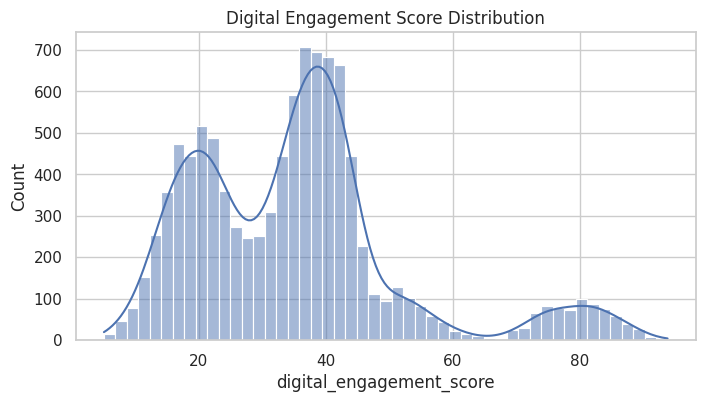

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['digital_engagement_score'], kde=True)
plt.title("Digital Engagement Score Distribution")
plt.show()

## Engangment Score v/s Churn

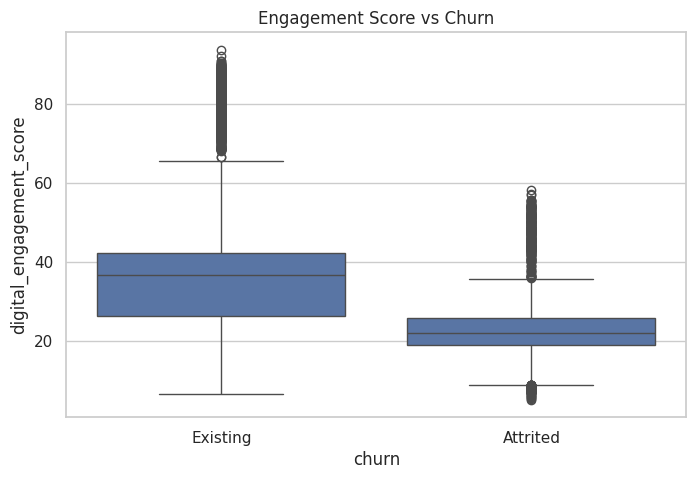

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='digital_engagement_score', data=df)
plt.title("Engagement Score vs Churn")
plt.xticks([0, 1], ['Existing', 'Attrited'])
plt.show()

## Transaction Amount vs Transaction Count by Churn

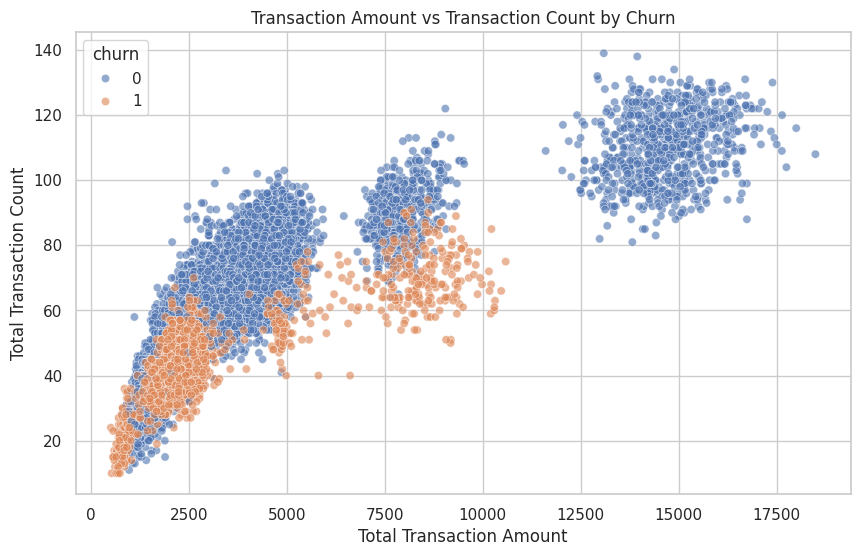

In [ ]:
import matplotlib.pyplot as plt
# Scatter plot of total_transaction_amount vs total_transaction_count by churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_transaction_amount', y='total_transaction_count', hue='churn', data=df, alpha=0.6)
plt.title('Transaction Amount vs Transaction Count by Churn')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Transaction Count')
plt.show()

## Correlation Heatmap


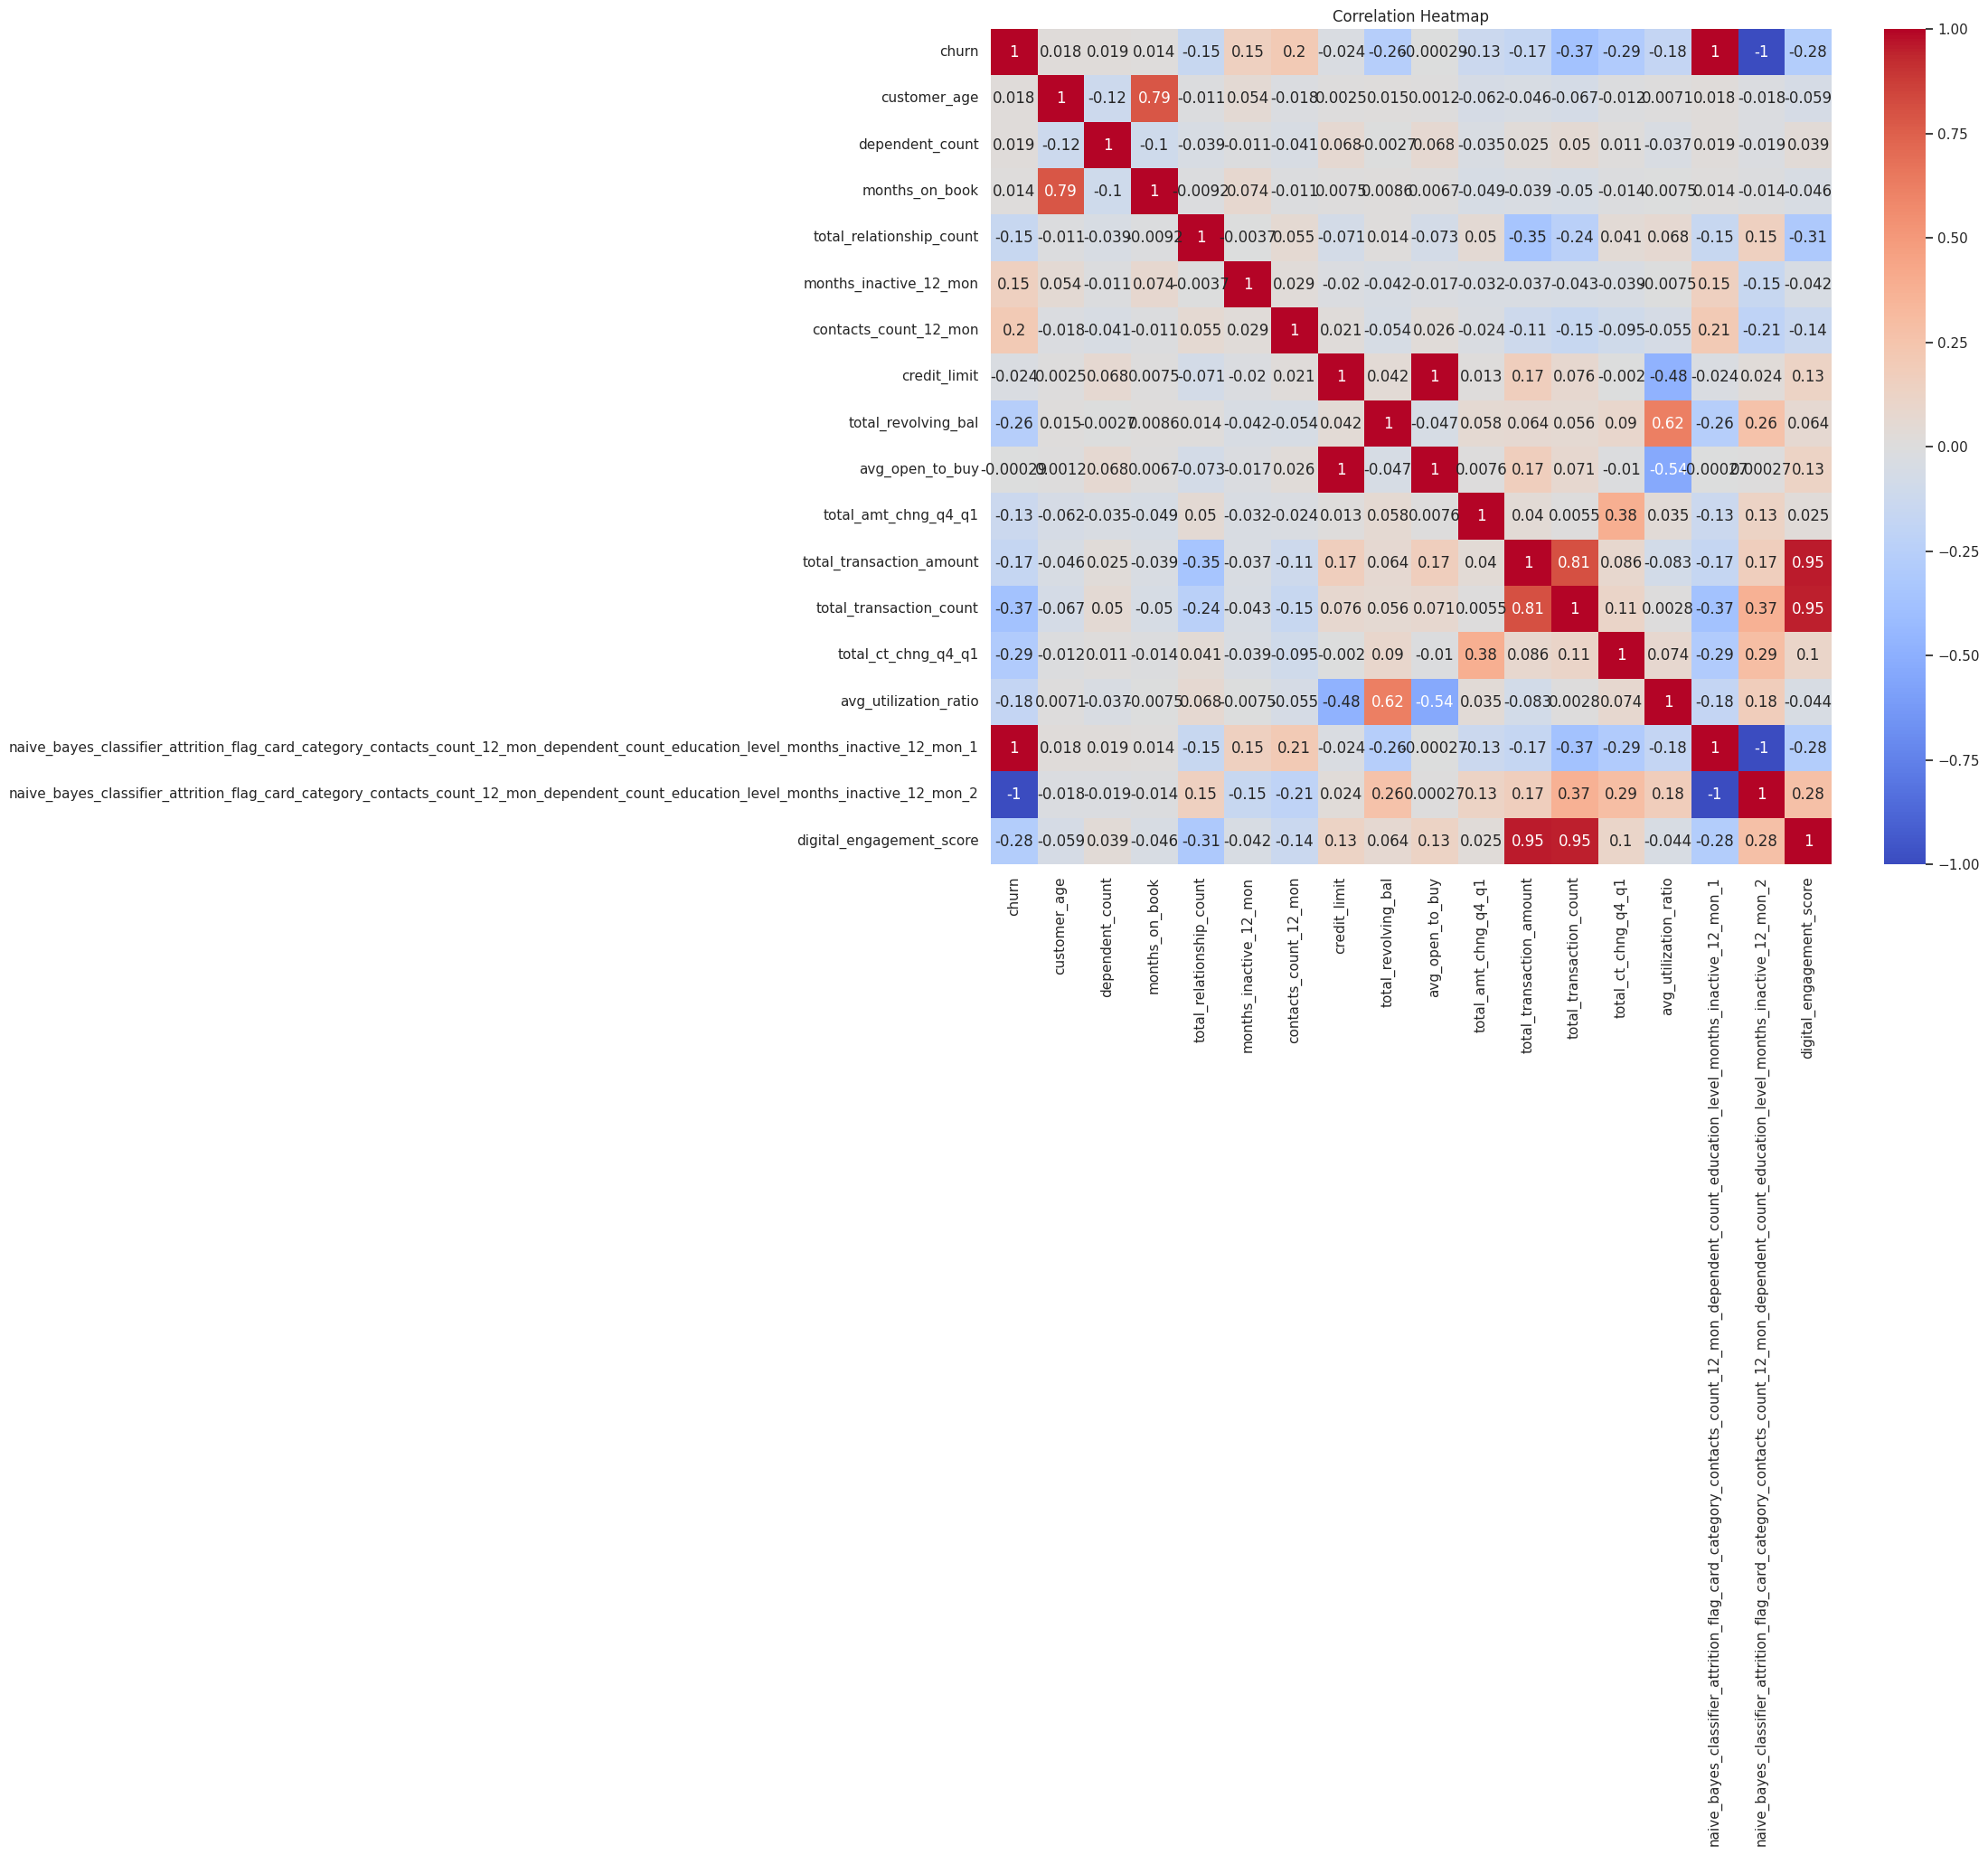

In [ ]:
plt.figure(figsize=(15,12))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr , annot=True , cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Save for modeling step
df.to_csv("bank_customers_features.csv", index=False)

print("✅ EDA complete. Features saved for modeling.")

✅ EDA complete. Features saved for modeling.
